### Question 1 analysis

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


folder_fight_stats = "Question_1_datasets/folder_fight_stats/"  
fodler_fighter_stats = "Question_1_datasets/folder_fighter_stats/"
intermediate_steps_folder = 'Question_1_datasets/Intermediate_datasets/'

# set up for printing whole dataframes
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

Read data


In [49]:
df_fight_stats = pd.read_csv(folder_fight_stats + "Corrected_merged_fights.csv")
df_fighter_stats = pd.read_csv(fodler_fighter_stats + "ufc-fighters-statistics.csv")

In [50]:
df_fight_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         2143 non-null   int64 
 1   red_fighter_name                   2143 non-null   object
 2   blue_fighter_name                  2143 non-null   object
 3   event_date                         2143 non-null   object
 4   red_fighter_nickname               2143 non-null   object
 5   blue_fighter_nickname              2143 non-null   object
 6   red_fighter_result                 2143 non-null   object
 7   blue_fighter_result                2143 non-null   object
 8   method                             2143 non-null   object
 9   round                              2143 non-null   int64 
 10  time                               2143 non-null   object
 11  time_format                        2143 non-null   object
 12  refere

In [51]:
df_fight_stats.head(5)

,Unnamed: 0,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,time_format,referee,details,bout_type,bonus,event_name,event_location,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts
0,0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,5 Rnd (5-5-5-5-5),Marc Goddard,Punch to Head At Distance,UFC Featherweight Title Bout,belt,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,---,0,0,0,0,0:45,0:00,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19
1,1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,5 Rnd (5-5-5-5-5),Jason Herzog,Rear Naked Choke,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,---,50,0,1,0,0,0:00,3:20,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,- - -,- - -
2,2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Vitor Ribeiro,Sal D'amato 28 - 29. Jacob Montalvo 28 - 29. T...,Light Heavyweight Bout,-,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,---,0,0,0,0,0,1:31,1:00,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28
3,3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,Mike Bell 28 - 29. Ben Cartlidge 28 - 29. Hadi...,Featherweight Bout,-,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,1,52 of 100,46 of 106,52,43,78 of 133,52 of 116,3 of 5,1 of 3,60,33,0,0,0,2,2:17,4:47,36 of 77,35 of 92,12 of 17,5 of 8,4 of 6,6 of 6,37 of 80,32 of 79,12 of 16,6 of 16,3 of 4,8 of 11,69,76,23,10,7,13,71,69,23,13,5,17,29 29 29,28 28 28
4,4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,3 Rnd (5-5-5),Kerry Hatley,Spinning Back Fist Head,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1,0,65 of 106,77 of 140,61,55,67 of 108,77 of 141,0 of 0,0 of 0,---,---,0,0,0,0,0:02,0:21,24 of 53,22 of 66,29 of 34,10 of 14,12 of 19,45 of 60,63 of 104,75 of 138,2 of 2,2 of 2,0 of 0,0 of 0,36,28,44,12,18,58,96,97,3,2,0,0,10 10 10,9 9 9


In [52]:
# This line of code is used to store correct version of the dataset, with comma as separator
#df_fight_stats.to_csv(folder_fight_stats + "Corrected_merged_fights.csv")

Second dataset

In [53]:
df_fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [54]:
df_fighter_stats.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


We need to connect these 2 datasets, using the fighters' names. Why, because we would like to predict the results of the fights. Firstly, we will check if we have all blue fighters and after that we will check if we have all red fighters

In [55]:
df_fighter_stats['name'] = df_fighter_stats['name'].str.upper()
df_fight_stats['red_fighter_name'] = df_fight_stats['red_fighter_name'].str.upper()
df_fight_stats['blue_fighter_name'] = df_fight_stats['blue_fighter_name'].str.upper()


# Merge statistics for red fighters
red_fighter_stats = df_fight_stats.merge(
    df_fighter_stats.add_prefix('red_'), 
    left_on='red_fighter_name', 
    right_on='red_name', 
    how='left'
)

# Merge statistics for blue fighters
merged_fighter_stats = red_fighter_stats.merge(
    df_fighter_stats.add_prefix('blue_'), 
    left_on='blue_fighter_name', 
    right_on='blue_name', 
    how='left'
)

merged_fighter_stats = merged_fighter_stats.drop(columns=['red_name', 'blue_name'])
#merged_fighter_stats.to_csv("Complete_merge.csv")


Probably, some fighter are missing or they were not recognized. We will extract them

In [56]:
# Extract fighters with missing values from merged data
missing_values_red = merged_fighter_stats[merged_fighter_stats.filter(like='red_').isnull().any(axis=1)]
missing_values_blue = merged_fighter_stats[merged_fighter_stats.filter(like='blue_').isnull().any(axis=1)]

missing_values_blue = missing_values_blue[['blue_fighter_name']].drop_duplicates()
missing_values_red = missing_values_red[['red_fighter_name']].drop_duplicates()


In [57]:
missing_values_red

,red_fighter_name
2,MAGOMED ANKALAEV
7,MATEUSZ REBECKI
8,ABUS MAGOMEDOV
15,ROB FONT
19,MATHEUS NICOLAU
...,...
2075,CHRIS DAUKAUS
2090,CASEY KENNEY
2102,KHADIS IBRAGIMOV
2109,MIRSAD BEKTIC


In [58]:
missing_values_blue

,blue_fighter_name
2,ALEKSANDAR RAKIC
5,RAFAEL CERQUEIRA
6,RAFAEL DOS ANJOS
7,MYKTYBEK OROLBAI
13,CARLOS LEAL
...,...
2129,ZELIM IMADAEV
2134,HUNTER AZURE
2140,ZAK CUMMINGS
2141,AUSTIN SPRINGER


## EDA analysis and data preparation.

### Data transformation

Firstly, we will create target features, which will define which fighter won the match. We will introduce new target feature, "who_wins". in case that Red fighter won, we will endoce it with "Red" in case that "Blue" fighter won, we will introduce "Blue". In our dataset, there is no Draw and it is very rare in real scenarsios, but in our code we will introduce that third category "Draw"

In [59]:
def create_target_feature(row):
    if(row["blue_fighter_result"] == 'W'):
        return "Blue"
    elif(row["red_fighter_result"] == 'W'):
        return "Red"
    else:
        return "Draw"
    
# apply this function and create target column
merged_fighter_stats['who_wins'] = merged_fighter_stats.apply(create_target_feature, axis=1) 

# we need to drop existing red_fighter_result and blue_fighter_result
merged_fighter_stats = merged_fighter_stats.drop(columns=['red_fighter_result', 'blue_fighter_result'])

merged_fighter_stats.head(5)

,Unnamed: 0,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,method,round,time,time_format,referee,details,bout_type,bonus,event_name,event_location,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_nickname,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_stance,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_nickname,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_stance,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins
0,0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,KO/TKO,3,1:34,5 Rnd (5-5-5-5-5),Marc Goddard,Punch to Head At Distance,UFC Featherweight Title Bout,belt,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,---,0,0,0,0,0:45,0:00,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19,El Matador,14.0,0.0,0.0,170.18,65.77,175.26,Orthodox,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,Blessed,25.0,7.0,0.0,180.34,65.77,175.26,Orthodox,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red
1,1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,Submission,1,3:34,5 Rnd (5-5-5-5-5),Jason Herzog,Rear Naked Choke,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,---,50,0,1,0,0,0:00,3:20,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,- - -,- - -,The Reaper,25.0,7.0,0.0,182.88,83.91,185.42,Orthodox,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,Borz,13.0,0.0,0.0,187.96,83.91,190.50,Orthodox,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue
2,2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Vitor Ribeiro,Sal D'amato 28 - 29. Jacob Montalvo 28 - 29. T...,Light Heavyweight Bout,-,UFC 308: Topuria vs. Holloway,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,---,0,0,0,0,0,1:31,1:00,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28,NaN,18.0,1.0,1.0,190.50,92.99,190.50,Orthodox,1992-06-02,3

#### Explanation of columns



---

### **Fighter Identification**
1. **`red_fighter_name`, `blue_fighter_name`**: Names of the red and blue fighters.
2. **`red_nickname`, `blue_nickname`**: Fighter nicknames (may not add predictive value).

---

### **Match Metadata**
1. **`event_date`**: Date of the match.
2. **`method`**: How the match ended (e.g., knockout, decision, submission).
3. **`round`**: The round in which the fight ended.
4. **`bout_type`**: Type of bout (e.g., main event, undercard).
5. **`bonus`**: Whether bonuses were awarded for performance.

---

### **Performance Metrics**
1. **Knockdowns (KD)**:
   - `red_fighter_KD`, `blue_fighter_KD`: Knockdowns delivered by each fighter.

2. **Significant Strikes (Sig Str)**:
   - `red_fighter_sig_str`, `blue_fighter_sig_str`: Total significant strikes landed.
   - `red_fighter_sig_str_pct`, `blue_fighter_sig_str_pct`: Strike accuracy percentage.
   - Detailed strikes (head, body, leg, distance, clinch, ground).

3. **Takedowns (TD)**:
   - `red_fighter_TD`, `blue_fighter_TD`: Total takedowns landed.
   - `red_fighter_TD_pct`, `blue_fighter_TD_pct`: Takedown accuracy percentage.

4. **Control Metrics**:
   - `red_fighter_ctrl`, `blue_fighter_ctrl`: Time spent controlling the opponent.
   - `red_fighter_sub_att`, `blue_fighter_sub_att`: Submission attempts.
   - `red_fighter_rev`, `blue_fighter_rev`: Reversals.

5. **Points**:
   - `red_fighter_total_pts`, `blue_fighter_total_pts`: Points scored.

---

### **Physical Attributes**
1. **Height**: `red_height_cm`, `blue_height_cm`.
2. **Weight**: `red_weight_in_kg`, `blue_weight_in_kg`.
3. **Reach**: `red_reach_in_cm`, `blue_reach_in_cm`.
4. **Stance**: `red_stance`, `blue_stance` (e.g., orthodox, southpaw).

---

### **Career Statistics**
1. **Wins/Losses/Draws**:
   - `red_wins`, `blue_wins`: Career wins.
   - `red_losses`, `blue_losses`: Career losses.
   - `red_draws`, `blue_draws`: Career draws.

2. **Striking Metrics**:
   - `red_significant_strikes_landed_per_minute`, `blue_significant_strikes_landed_per_minute`: Strikes landed per minute.
   - `red_significant_striking_accuracy`, `blue_significant_striking_accuracy`: Accuracy.
   - `red_significant_strikes_absorbed_per_minute`, `blue_significant_strikes_absorbed_per_minute`: Strikes absorbed.

3. **Defense Metrics**:
   - `red_significant_strike_defence`, `blue_significant_strike_defence`: Percentage of strikes defended.
   - `red_takedown_defense`, `blue_takedown_defense`: Takedown defense percentage.

4. **Takedowns and Submissions**:
   - `red_average_takedowns_landed_per_15_minutes`, `blue_average_takedowns_landed_per_15_minutes`: Takedowns per 15 minutes.
   - `red_average_submissions_attempted_per_15_minutes`, `blue_average_submissions_attempted_per_15_minutes`: Submission attempts.

---

### **Outcome**
1. **`who_wins`**: Target feature (Red, Blue, or Draw).

---

#### Remove irrelevant features

For the analysis, there are some feature that are completely irrelevant for prediction. We will remove them.


In [60]:
merged_fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 95 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         2164 non-null   int64  
 1   red_fighter_name                                   2164 non-null   object 
 2   blue_fighter_name                                  2164 non-null   object 
 3   event_date                                         2164 non-null   object 
 4   red_fighter_nickname                               2164 non-null   object 
 5   blue_fighter_nickname                              2164 non-null   object 
 6   method                                             2164 non-null   object 
 7   round                                              2164 non-null   int64  
 8   time                                               2164 non-null   object 
 9   time_for

In [61]:
columns_to_drop = ['Unnamed: 0', 'event_date', 'red_fighter_nickname', 'blue_fighter_nickname', 'time_format', 'referee', 'details', 'event_name',
                   'event_location', 'red_nickname', 'red_stance', 'blue_nickname', 'blue_stance']

merged_fighter_stats = merged_fighter_stats.drop(columns=columns_to_drop)

merged_fighter_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 82 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   red_fighter_name                                   2164 non-null   object 
 1   blue_fighter_name                                  2164 non-null   object 
 2   method                                             2164 non-null   object 
 3   round                                              2164 non-null   int64  
 4   time                                               2164 non-null   object 
 5   bout_type                                          2164 non-null   object 
 6   bonus                                              2164 non-null   object 
 7   red_fighter_KD                                     2164 non-null   int64  
 8   blue_fighter_KD                                    2164 non-null   int64  
 9   red_figh

In [62]:
display(merged_fighter_stats)

,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,1:34,UFC Featherweight Title Bout,belt,1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,---,0,0,0,0,0:45,0:00,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19,14.0,0.0,0.0,170.18,65.77,175.26,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,3:34,Middleweight Bout,perf,0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,---,50,0,1,0,0,0:00,3:20,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,- - -,- - -,25.0,7.0,0.0,182.88,83.91,185.42,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,5:00,Light Heavyweight Bout,-,0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,---,0,0,0,0,0,1:31,1:00,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28,18.0,1.0,1.0,190.50,92.99,190.50,1992-06-02,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,1992-02-06,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,5:00,Featherweight Bout,-,0,1,52 of 100,46 of 106,52,43,78 of 133,52 of 116,3 of 5,1 of 3,60,33,0,0,0,2,2:17,4:47,36 of 77,35 of 92,12 of 17,5 of 8,4 of 6,6 of 6,37 of 80,32 of 79,12 of 16,6 of 16,3 of 4,8 of 11,69,76,23,10,7,13,71,69,23,13,5,17,29 29 29,28 28 28,13.0,0.0,1.0,175.26,65.77,185.42,1991-07-22,3.65,50.0,2.40,56.0,1.29,46.0,46.0,0.9,17.0,7.0,0.0,170.18,65.77,180.34,1991-08-06,3.76,45.0,3.53,57.0,1.07,26.0,58.0,0.3,Red
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,KO/TKO,2,4:52,Middleweight Bout,perf,1,0,65 of 106,77 of 140,61,55,67 of 108,77 of 141,0 of 0,0 of 0,---

In this dataset, there are values - or --- which represents the missing values in the dataset. We will replace with nan, to avoid any confusion

In [63]:
merged_fighter_stats = merged_fighter_stats.replace(['-', '---', '- - -'], np.nan)

# verify if there still exists values with --- and -
null_like_values = (merged_fighter_stats == '---').sum().sum() + (merged_fighter_stats == '-').sum().sum()
print(null_like_values)

0


In [64]:
merged_fighter_stats

,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,1:34,UFC Featherweight Title Bout,belt,1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,NaN,0,0,0,0,0:45,0:00,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19,14.0,0.0,0.0,170.18,65.77,175.26,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,3:34,Middleweight Bout,perf,0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,NaN,50,0,1,0,0,0:00,3:20,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,5:00,Light Heavyweight Bout,NaN,0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,NaN,0,0,0,0,0,1:31,1:00,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28,18.0,1.0,1.0,190.50,92.99,190.50,1992-06-02,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,1992-02-06,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,5:00,Featherweight Bout,NaN,0,1,52 of 100,46 of 106,52,43,78 of 133,52 of 116,3 of 5,1 of 3,60,33,0,0,0,2,2:17,4:47,36 of 77,35 of 92,12 of 17,5 of 8,4 of 6,6 of 6,37 of 80,32 of 79,12 of 16,6 of 16,3 of 4,8 of 11,69,76,23,10,7,13,71,69,23,13,5,17,29 29 29,28 28 28,13.0,0.0,1.0,175.26,65.77,185.42,1991-07-22,3.65,50.0,2.40,56.0,1.29,46.0,46.0,0.9,17.0,7.0,0.0,170.18,65.77,180.34,1991-08-06,3.76,45.0,3.53,57.0,1.07,26.0,58.0,0.3,Red
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,KO/TKO,2,4:52,Middleweight Bout,perf,1,0,65 of 106,77 of 140,61,55,67 of 108,77 of 141,0 of 0,0 of 0,NaN

Now we will need to apply some transformations for the columns and conver them to numeric feature instead of time feature. Those columns are 'time', 'red_fighter_ctrl', 'blue_fighter_ctrl'

In [65]:
def convert_time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan  # Handle invalid or missing values

# columns to tranfomr from date to int
time_format_transf_cols = ['time', 'red_fighter_ctrl', 'blue_fighter_ctrl']

for col in time_format_transf_cols:
    merged_fighter_stats[col] = merged_fighter_stats[col].apply(convert_time_to_seconds)

merged_fighter_stats



,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str,blue_fighter_sig_str,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_total_str,blue_fighter_total_str,red_fighter_TD,blue_fighter_TD,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head,blue_fighter_sig_str_head,red_fighter_sig_str_body,blue_fighter_sig_str_body,red_fighter_sig_str_leg,blue_fighter_sig_str_leg,red_fighter_sig_str_distance,blue_fighter_sig_str_distance,red_fighter_sig_str_clinch,blue_fighter_sig_str_clinch,red_fighter_sig_str_ground,blue_fighter_sig_str_ground,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,75 of 144,79 of 204,52,38,78 of 147,84 of 209,2 of 2,0 of 0,100,NaN,0,0,0,0,45,0,49 of 114,47 of 151,11 of 14,13 of 30,15 of 16,19 of 23,71 of 140,79 of 204,0 of 0,0 of 0,4 of 4,0 of 0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19,14.0,0.0,0.0,170.18,65.77,175.26,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,2 of 2,3 of 4,100,75,2 of 2,25 of 31,0 of 0,2 of 4,NaN,50,0,1,0,0,0,200,0 of 0,2 of 3,0 of 0,1 of 1,2 of 2,0 of 0,2 of 2,0 of 1,0 of 0,0 of 0,0 of 0,3 of 3,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,55 of 114,53 of 117,48,45,75 of 142,59 of 123,0 of 0,0 of 1,NaN,0,0,0,0,0,91,60,20 of 72,10 of 65,22 of 29,9 of 12,13 of 13,34 of 40,50 of 105,50 of 111,5 of 9,3 of 6,0 of 0,0 of 0,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28,18.0,1.0,1.0,190.50,92.99,190.50,1992-06-02,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,1992-02-06,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,NaN,0,1,52 of 100,46 of 106,52,43,78 of 133,52 of 116,3 of 5,1 of 3,60,33,0,0,0,2,137,287,36 of 77,35 of 92,12 of 17,5 of 8,4 of 6,6 of 6,37 of 80,32 of 79,12 of 16,6 of 16,3 of 4,8 of 11,69,76,23,10,7,13,71,69,23,13,5,17,29 29 29,28 28 28,13.0,0.0,1.0,175.26,65.77,185.42,1991-07-22,3.65,50.0,2.40,56.0,1.29,46.0,46.0,0.9,17.0,7.0,0.0,170.18,65.77,180.34,1991-08-06,3.76,45.0,3.53,57.0,1.07,26.0,58.0,0.3,Red
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,KO/TKO,2,292,Middleweight Bout,perf,1,0,65 of 106,77 of 140,61,55,67 of 108,77 of 141,0 of 0,0 of 0,NaN,NaN,0,0,0,0,2,21,24 

Now, we can see that some columns such as red_fighter_sig_str has value "number A of number B". We will locate those columns, exctract values and we will make them as separate columns.

In [66]:
# create function for spliting
def split_pattern(val):
    try:
        a, b = val.split(" of ")
        return int(a), int(b)
    except: 
        return np.nan, np.nan

# detect columns which have pattern value "number A of number B"
columns_contians_pattern = []

for col in merged_fighter_stats.columns:
    if merged_fighter_stats[col].astype(str).str.contains(" of ", na=False).any():
        columns_contians_pattern.append(col)

# go through columns and apply spliting
for col in columns_contians_pattern:
    landed_col = f"{col}_landed"
    attempted_col = f"{col}_attempted"


    merged_fighter_stats[[landed_col, attempted_col]] = merged_fighter_stats[col].apply(
        lambda x: pd.Series(split_pattern(x))
    )

    merged_fighter_stats.drop(columns=[col], inplace=True)


merged_fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 100 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   red_fighter_name                                   2164 non-null   object 
 1   blue_fighter_name                                  2164 non-null   object 
 2   method                                             2164 non-null   object 
 3   round                                              2164 non-null   int64  
 4   time                                               2164 non-null   int64  
 5   bout_type                                          2164 non-null   object 
 6   bonus                                              699 non-null    object 
 7   red_fighter_KD                                     2164 non-null   int64  
 8   blue_fighter_KD                                    2164 non-null   int64  
 9   red_fig

In [67]:
merged_fighter_stats


,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52,38,100,NaN,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,20 20 19,18 18 19,14.0,0.0,0.0,170.18,65.77,175.26,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100,75,NaN,50,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,48,45,NaN,0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,29 29 29,28 28 28,18.0,1.0,1.0,190.50,92.99,190.50,1992-06-02,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,1992-02-06,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Feathe

Now, we have two columns, red_fighter_total_points and blue_fighter_total_points. We will sum all points that they achieved, because it is easier to also handle misisng values (somehow we can calculate the points for fighters if they have missing values for points)

In [68]:
# calculate scores
def split_n_sum_points(val):
    try:
        scores = [float(i) for i in val.split(" ")]
        return sum(scores)
    except:
        return np.nan
    


columns_for_sum_points = ['red_fighter_total_pts', 'blue_fighter_total_pts']

for col in columns_for_sum_points:
    merged_fighter_stats[col] = merged_fighter_stats[col].apply(split_n_sum_points)


merged_fighter_stats

,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_date_of_birth,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_date_of_birth,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52,38,100,NaN,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,59.0,55.0,14.0,0.0,0.0,170.18,65.77,175.26,1997-01-21,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,1991-12-04,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100,75,NaN,50,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,1990-12-20,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,1994-05-01,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,48,45,NaN,0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,87.0,84.0,18.0,1.0,1.0,190.50,92.99,190.50,1992-06-02,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,1992-02-06,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,NaN

Final transformation would be instead of birth of the fighter, we will use age of the fighter

In [69]:
from datetime import datetime

# Function to calculate age from date of birth
def calculate_age(dob):
    try:
        birth_date = datetime.strptime(dob, '%Y-%m-%d')  # Assuming date format is 'YYYY-MM-DD'
        today = datetime.today()
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    except:
        return np.nan  # Handle invalid or missing dates

# Convert red and blue date of birth columns to age
for prefix in ['red', 'blue']:
    merged_fighter_stats[f'{prefix}_fighter_age'] = merged_fighter_stats[f'{prefix}_date_of_birth'].apply(calculate_age)

# Drop the original date of birth columns
merged_fighter_stats.drop(columns=['red_date_of_birth', 'blue_date_of_birth'], inplace=True)

merged_fighter_stats


,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted,red_fighter_age,blue_fighter_age
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52,38,100,NaN,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,59.0,55.0,14.0,0.0,0.0,170.18,65.77,175.26,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0,27.0,33.0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100,75,NaN,50,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3,34.0,30.0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,48,45,NaN,0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,87.0,84.0,18.0,1.0,1.0,190.50,92.99,190.50,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0,32.0,32.0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,NaN,0,1,52,43,60,33,0,0,0,2,137,287,69,76,2

In [70]:
merged_fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 100 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   red_fighter_name                                   2164 non-null   object 
 1   blue_fighter_name                                  2164 non-null   object 
 2   method                                             2164 non-null   object 
 3   round                                              2164 non-null   int64  
 4   time                                               2164 non-null   int64  
 5   bout_type                                          2164 non-null   object 
 6   bonus                                              699 non-null    object 
 7   red_fighter_KD                                     2164 non-null   int64  
 8   blue_fighter_KD                                    2164 non-null   int64  
 9   red_fig

However, there are still 4 properties which are object but not int. They are 'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct', 'red_fighter_TD_pct', 'blue_fighter_TD_pct'

In [71]:
columns_to_cast = ['red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct', 'red_fighter_TD_pct', 'blue_fighter_TD_pct']
for column in columns_to_cast:
    merged_fighter_stats[column] = pd.to_numeric(merged_fighter_stats[column], errors='coerce')


merged_fighter_stats.info()
merged_fighter_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 100 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   red_fighter_name                                   2164 non-null   object 
 1   blue_fighter_name                                  2164 non-null   object 
 2   method                                             2164 non-null   object 
 3   round                                              2164 non-null   int64  
 4   time                                               2164 non-null   int64  
 5   bout_type                                          2164 non-null   object 
 6   bonus                                              699 non-null    object 
 7   red_fighter_KD                                     2164 non-null   int64  
 8   blue_fighter_KD                                    2164 non-null   int64  
 9   red_fig

,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_fighter_total_pts,blue_fighter_total_pts,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted,red_fighter_age,blue_fighter_age
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52.0,38.0,100.0,NaN,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,59.0,55.0,14.0,0.0,0.0,170.18,65.77,175.26,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0,27.0,33.0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100.0,75.0,NaN,50.0,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,NaN,NaN,25.0,7.0,0.0,182.88,83.91,185.42,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3,34.0,30.0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,48.0,45.0,NaN,0.0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,87.0,84.0,18.0,1.0,1.0,190.50,92.99,190.50,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0,32.0,32.0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,NaN,0,1,52.0,43.0,60.0,33

In [72]:
merged_fighter_stats.to_csv(intermediate_steps_folder + "DS_after_transformations.csv", index=False)

### Handling Missing values

Now, we will handle missing values, but before that, we will spearate categorical and numerical features

In [73]:
numerical_features = merged_fighter_stats.select_dtypes(include=['float64', 'int64']).columns
categorical_features = merged_fighter_stats.select_dtypes(include=['object']).columns


display(numerical_features)
display(categorical_features)


Index(['round', 'time', 'red_fighter_KD', 'blue_fighter_KD',
       'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct',
       'red_fighter_TD_pct', 'blue_fighter_TD_pct', 'red_fighter_sub_att',
       'blue_fighter_sub_att', 'red_fighter_rev', 'blue_fighter_rev',
       'red_fighter_ctrl', 'blue_fighter_ctrl', 'red_fighter_sig_str_head_pct',
       'blue_fighter_sig_str_head_pct', 'red_fighter_sig_str_body_pct',
       'blue_fighter_sig_str_body_pct', 'red_fighter_sig_str_leg_pct',
       'blue_fighter_sig_str_leg_pct', 'red_fighter_sig_str_distance_pct',
       'blue_fighter_sig_str_distance_pct', 'red_fighter_sig_str_clinch_pct',
       'blue_fighter_sig_str_clinch_pct', 'red_fighter_sig_str_ground_pct',
       'blue_fighter_sig_str_ground_pct', 'red_fighter_total_pts',
       'blue_fighter_total_pts', 'red_wins', 'red_losses', 'red_draws',
       'red_height_cm', 'red_weight_in_kg', 'red_reach_in_cm',
       'red_significant_strikes_landed_per_minute',
       'red_significant_st

Index(['red_fighter_name', 'blue_fighter_name', 'method', 'bout_type', 'bonus',
       'who_wins'],
      dtype='object')

Now, we will first impute values of numerical columns.

We need to check percentage of missing values in the columns

In [74]:
# Calculate the percentage of missing values for numerical features
def calculate_missing_val_pct(df, features):
    missing_percentage = df[features].isnull().mean() * 100

    # Filter numerical features with missing values
    missing_percentage = missing_percentage[missing_percentage > 0]

    # Sort by highest percentage
    missing_percentage = missing_percentage.sort_values(ascending=False)

    return missing_percentage

# Print the result
print("Percentage of Missing Values for Numerical Features:")
print(calculate_missing_val_pct(merged_fighter_stats, numerical_features))


Percentage of Missing Values for Numerical Features:
blue_fighter_TD_pct                                  37.892791
red_fighter_TD_pct                                   33.502773
blue_fighter_total_pts                               23.706100
red_fighter_total_pts                                23.613678
blue_reach_in_cm                                      2.634011
blue_fighter_age                                      2.495379
blue_height_cm                                        2.402957
blue_weight_in_kg                                     2.310536
blue_takedown_accuracy                                2.218115
blue_takedown_defense                                 2.218115
red_reach_in_cm                                       2.218115
red_height_cm                                         2.218115
blue_wins                                             2.218115
blue_significant_strikes_landed_per_minute            2.218115
blue_losses                                           2.218115
bl

For those columns: 'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct', 'red_fighter_TD_pct', 'blue_fighter_TD_pct', we will calculate value using attempted and landed strikes

In [75]:
columns_to_calculate = {
    'red_fighter_sig_str_pct': ('red_fighter_sig_str_landed', 'red_fighter_sig_str_attempted'),
    'blue_fighter_sig_str_pct': ('blue_fighter_sig_str_landed', 'blue_fighter_sig_str_attempted'),
    'red_fighter_TD_pct': ('red_fighter_TD_landed', 'red_fighter_TD_attempted'),
    'blue_fighter_TD_pct': ('blue_fighter_TD_landed', 'blue_fighter_TD_attempted')
}

# Impute missing values based on calculation for remaining rows
for col, (landed_col, attempted_col) in columns_to_calculate.items():
    if landed_col in merged_fighter_stats.columns and attempted_col in merged_fighter_stats.columns:
        # For rows where attempted is 0 or NaN, set percentage to 0 (no attempts = no success rate)
        merged_fighter_stats.loc[
            (merged_fighter_stats[col].isnull()) & (merged_fighter_stats[attempted_col] == 0),
            col
        ] = 0
        # Calculate for remaining missing values where attempted is valid
        merged_fighter_stats[col] = merged_fighter_stats[col].fillna(
            (merged_fighter_stats[landed_col] / merged_fighter_stats[attempted_col]) * 100
        )

# Check if any missing values remain
merged_fighter_stats[columns_to_calculate.keys()].isnull().sum()

red_fighter_sig_str_pct     0
blue_fighter_sig_str_pct    0
red_fighter_TD_pct          0
blue_fighter_TD_pct         0
dtype: int64

Regarding the columns red_fighter_total_pts and blue_fighter_total_pts, it is logical to remove those columns because:

1. **Data Leakage**: Including **total points** that are calculated from post-fight statistics (e.g., strikes landed, takedowns), the model will have access to information that wouldn't be available before the fight, leading to unrealistic predictions.

2. **Existing Statistics as Features**: Out plan was to use **existing statistics** (e.g., strikes, takedowns) to calculate points, these granular features will already capture the information needed for classification. Including both the raw stats and total points introduces redundancy.

3. **Improved Model Generalization**: By excluding the total points and relying on raw features, the model learns to generalize better, as it must determine the relationships between raw statistics and the outcome.


In [76]:
merged_fighter_stats.drop(columns=['blue_fighter_total_pts', 'red_fighter_total_pts'], inplace=True)
numerical_features = merged_fighter_stats.select_dtypes(include=['float64', 'int64']).columns #extract new numerical features

In [77]:
print(calculate_missing_val_pct(merged_fighter_stats, numerical_features))

blue_reach_in_cm                                     2.634011
blue_fighter_age                                     2.495379
blue_height_cm                                       2.402957
blue_weight_in_kg                                    2.310536
red_reach_in_cm                                      2.218115
red_height_cm                                        2.218115
blue_wins                                            2.218115
blue_significant_strikes_landed_per_minute           2.218115
blue_losses                                          2.218115
blue_draws                                           2.218115
blue_significant_strike_defence                      2.218115
blue_average_takedowns_landed_per_15_minutes         2.218115
blue_significant_strikes_absorbed_per_minute         2.218115
blue_significant_striking_accuracy                   2.218115
blue_takedown_accuracy                               2.218115
blue_takedown_defense                                2.218115
blue_ave

Regarding others features, we will inpute them in next way

Imputation strategy -> Mean
    Fighter attributes (Age, Height, Weight, Reach) -> They are physical attributes and it is reasonable to use mean or median for inputing and alos missing percentage is low. 

Imputation strategy -> Fill with 0
    Fighter Performance Metrics (Strikes, Defence, Accuracy, Takedowns, Submissions) -> if there is a missing values, usually that indicates that no action occured 
    Records (Wins, Losses, Draws) ->  if there is a missing values, usually that indicates that no action occured 

Additionally, we will introduce the 2 columns, blue_fighter_stats_missing and red_fighter_stats_missing. Reason behind it is to give model more information that those missing values are because fighter in dataset 1 did not exist in dataset 2, so we need to add additional info why. If stats missing, we put 1, otherwise 0.


In [78]:
# define columns for inputation
attributes = [
    'blue_fighter_age', 'blue_height_cm', 'blue_weight_in_kg', 'blue_reach_in_cm',
    'red_fighter_age', 'red_height_cm', 'red_weight_in_kg', 'red_reach_in_cm'
]
performance_metrics = [
    'blue_significant_strikes_landed_per_minute', 'blue_significant_strike_defence',
    'blue_average_takedowns_landed_per_15_minutes', 'blue_significant_strikes_absorbed_per_minute',
    'blue_significant_striking_accuracy', 'blue_takedown_accuracy', 'blue_takedown_defense',
    'blue_average_submissions_attempted_per_15_minutes', 'red_significant_strikes_landed_per_minute',
    'red_significant_strike_defence', 'red_average_takedowns_landed_per_15_minutes',
    'red_significant_strikes_absorbed_per_minute', 'red_significant_striking_accuracy',
    'red_takedown_accuracy', 'red_takedown_defense', 'red_average_submissions_attempted_per_15_minutes'
]
record_features = [
    'blue_wins', 'blue_losses', 'blue_draws', 'red_wins', 'red_losses', 'red_draws'
]


# create new columns to explain why we have missing values
merged_fighter_stats['blue_fighter_stats_missing'] = merged_fighter_stats[['blue_wins']].isnull().astype(int) # only 1 column is enought for detection
merged_fighter_stats['red_fighter_stats_missing'] = merged_fighter_stats[['red_wins']].isnull().astype(int) 


# for performance and record metrics, input 0
for col in performance_metrics + record_features:
    merged_fighter_stats[col] = merged_fighter_stats[col].fillna(0)

# for attributes fill with mean
for col in attributes:
    merged_fighter_stats[col] = merged_fighter_stats[col].fillna(merged_fighter_stats[col].mean())

print(calculate_missing_val_pct(merged_fighter_stats, numerical_features))
merged_fighter_stats

Series([], dtype: float64)


,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted,red_fighter_age,blue_fighter_age,blue_fighter_stats_missing,red_fighter_stats_missing
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52.0,38.0,100.0,0.0,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,14.0,0.0,0.0,170.18,65.77,175.26,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0,27.0,33.0,0,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100.0,75.0,0.0,50.0,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,25.0,7.0,0.0,182.88,83.91,185.42,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3,34.0,30.0,0,0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,NaN,0,0,48.0,45.0,0.0,0.0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,18.0,1.0,1.0,190.50,92.99,190.50,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0,32.0,32.0,0,0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,NaN,0,1,52.0,43.0,60.0,33.0,0,0,0

Now we will focus on categorical features

In [79]:
print(calculate_missing_val_pct(merged_fighter_stats, categorical_features))

bonus    67.698706
dtype: float64


Because we have missing values for 'bonus', it is most likely that it did not occure. We will inpute it with 'No bonus' value

In [80]:
merged_fighter_stats['bonus'] = merged_fighter_stats['bonus'].fillna('No bonus')

print(calculate_missing_val_pct(merged_fighter_stats, categorical_features))

Series([], dtype: float64)


In [81]:
# print dataset and save this in next csv
merged_fighter_stats.to_csv(intermediate_steps_folder + "Ds_after_imputation_missing_val.csv", index=False)
merged_fighter_stats

,red_fighter_name,blue_fighter_name,method,round,time,bout_type,bonus,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_reach_in_cm,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_weight_in_kg,blue_reach_in_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,who_wins,red_fighter_sig_str_landed,red_fighter_sig_str_attempted,blue_fighter_sig_str_landed,blue_fighter_sig_str_attempted,red_fighter_total_str_landed,red_fighter_total_str_attempted,blue_fighter_total_str_landed,blue_fighter_total_str_attempted,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_head_landed,red_fighter_sig_str_head_attempted,blue_fighter_sig_str_head_landed,blue_fighter_sig_str_head_attempted,red_fighter_sig_str_body_landed,red_fighter_sig_str_body_attempted,blue_fighter_sig_str_body_landed,blue_fighter_sig_str_body_attempted,red_fighter_sig_str_leg_landed,red_fighter_sig_str_leg_attempted,blue_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_attempted,red_fighter_sig_str_distance_landed,red_fighter_sig_str_distance_attempted,blue_fighter_sig_str_distance_landed,blue_fighter_sig_str_distance_attempted,red_fighter_sig_str_clinch_landed,red_fighter_sig_str_clinch_attempted,blue_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_attempted,red_fighter_sig_str_ground_landed,red_fighter_sig_str_ground_attempted,blue_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_attempted,red_fighter_age,blue_fighter_age,blue_fighter_stats_missing,red_fighter_stats_missing
0,ILIA TOPURIA,MAX HOLLOWAY,KO/TKO,3,94,UFC Featherweight Title Bout,belt,1,0,52.0,38.0,100.0,0.0,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,14.0,0.0,0.0,170.18,65.77,175.26,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,65.77,175.26,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,Red,75,144,79,204,78,147,84,209,2,2,0,0,49,114,47,151,11,14,13,30,15,16,19,23,71,140,79,204,0,0,0,0,4,4,0,0,27.0,33.0,0,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,Submission,1,214,Middleweight Bout,perf,0,0,100.0,75.0,0.0,50.0,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,25.0,7.0,0.0,182.88,83.91,185.42,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,83.91,190.50,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,Blue,2,2,3,4,2,2,25,31,0,0,2,4,0,0,2,3,0,0,1,1,2,2,0,0,2,2,0,1,0,0,0,0,0,0,3,3,34.0,30.0,0,0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,Decision - Unanimous,3,300,Light Heavyweight Bout,No bonus,0,0,48.0,45.0,0.0,0.0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,18.0,1.0,1.0,190.50,92.99,190.50,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,92.99,198.12,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,Red,55,114,53,117,75,142,59,123,0,0,0,1,20,72,10,65,22,29,9,12,13,13,34,40,50,105,50,111,5,9,3,6,0,0,0,0,32.0,32.0,0,0
3,LERONE MURPHY,DAN IGE,Decision - Unanimous,3,300,Featherweight Bout,No bonus,0,1,52.0,43.0,60.0,

## Visualizations

#### Vis 1: Outcome Distribution

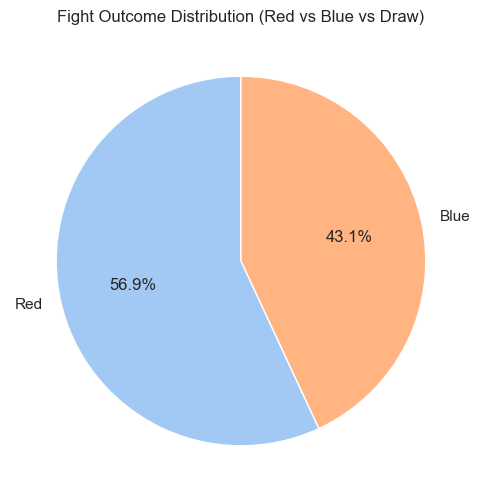

In [82]:
fighter_outcome_count = merged_fighter_stats['who_wins'].value_counts()

plt.figure(figsize=(10, 6))
fighter_outcome_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Fight Outcome Distribution (Red vs Blue vs Draw)")
plt.ylabel("")
plt.show()

#### Vis 2: Round-wise Fight Outcomes

<Figure size 1000x600 with 0 Axes>

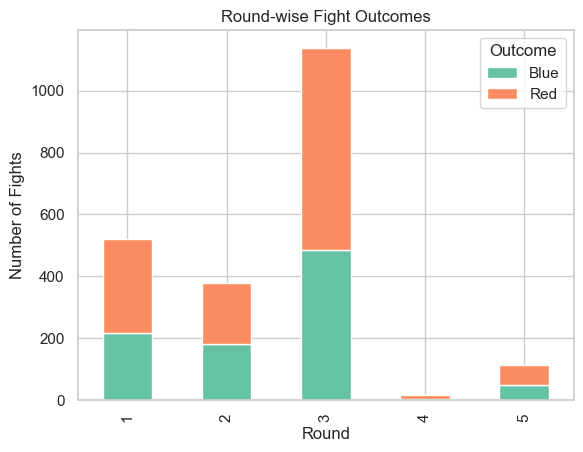

In [83]:
round_outcomes = merged_fighter_stats.groupby(['round', 'who_wins']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
round_outcomes.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))
plt.title("Round-wise Fight Outcomes")
plt.xlabel("Round")
plt.ylabel("Number of Fights")
plt.legend(title="Outcome")
plt.show()

#### Vis 3: Fight Method outcome

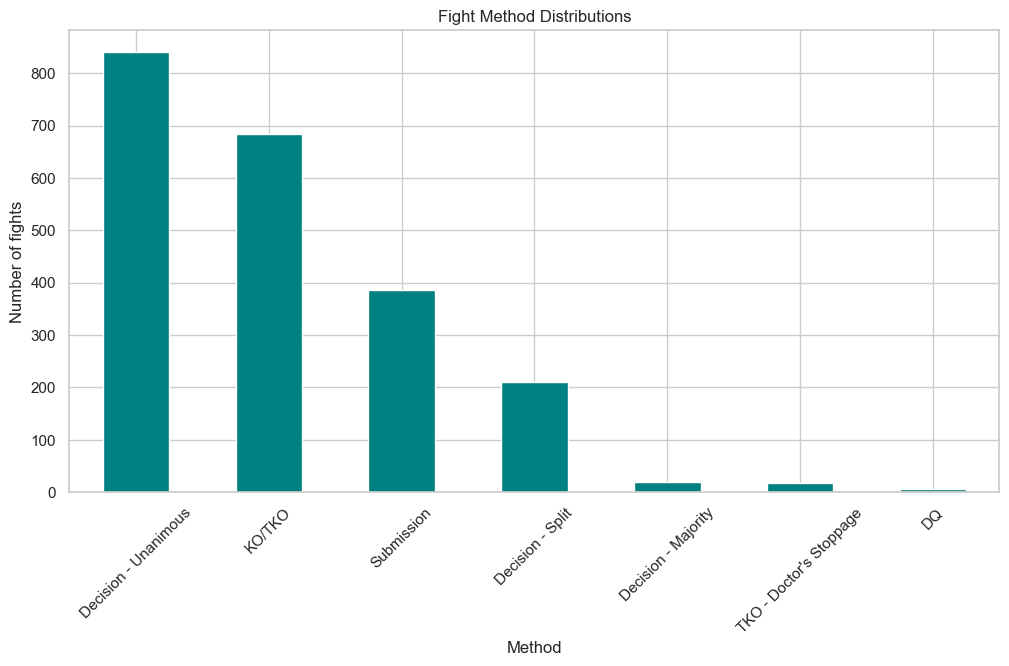

In [84]:
method_counts = merged_fighter_stats['method'].value_counts()

plt.figure(figsize=(12, 6))
method_counts.plot(kind='bar', color='teal')
plt.title('Fight Method Distributions')
plt.xlabel('Method')
plt.ylabel('Number of fights')
plt.xticks(rotation=45)
plt.show()

### Vis 5:  boxplots for outliers

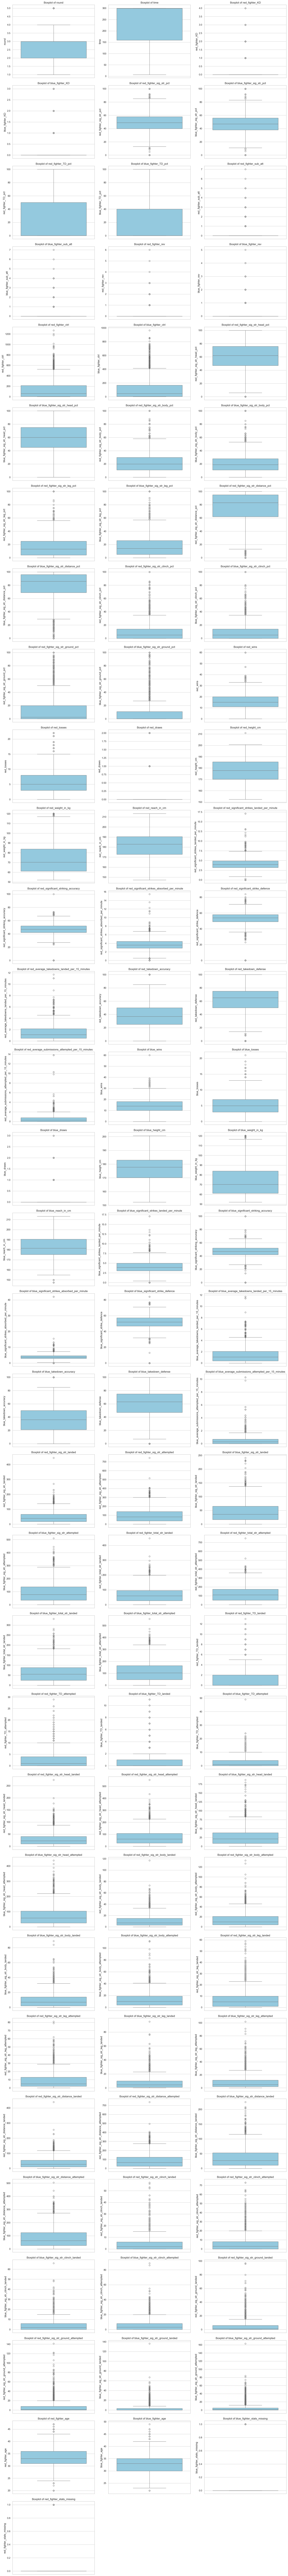

In [85]:
# Identify numeric features
numeric_features = merged_fighter_stats.select_dtypes(include=['float64', 'int64']).columns

# Initialize plot variables
num_features = len(numeric_features)
num_rows = (num_features // 3) + (num_features % 3 > 0)  # Calculate number of rows

# Plot boxplots for numeric features
plt.figure(figsize=(18, num_rows * 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=merged_fighter_stats[feature], color='skyblue')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel("")

plt.tight_layout()
plt.show()


#### Vis 6: ?

#### Vis 7: Correlation Heatmap 

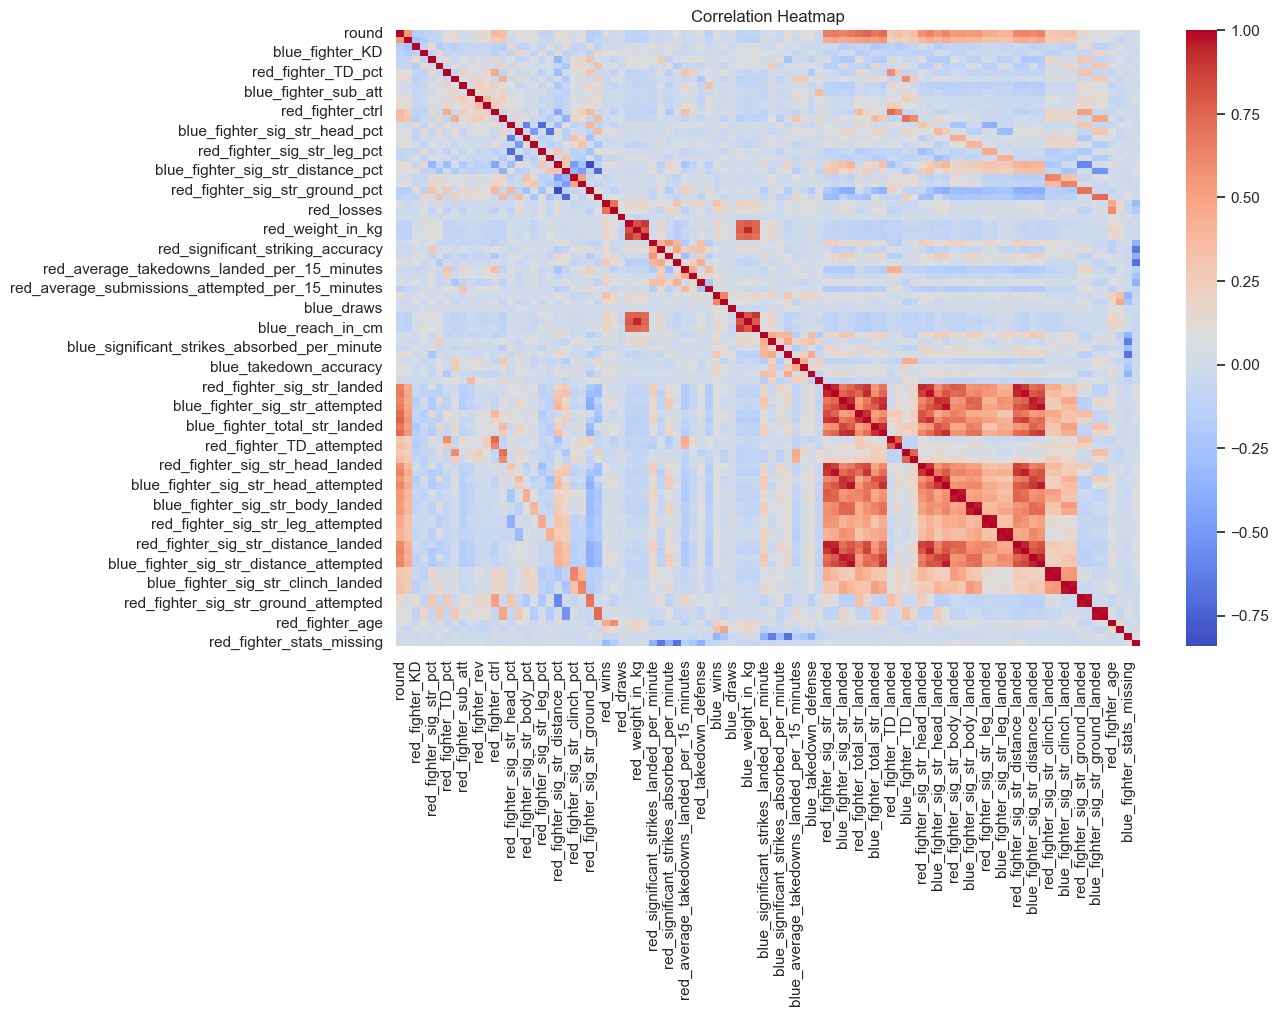

In [86]:
correlation_matrix = merged_fighter_stats.select_dtypes(include=['float64', 'int64', 'Int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

We can see that we have highly correlated columns, which we need to extract ans show


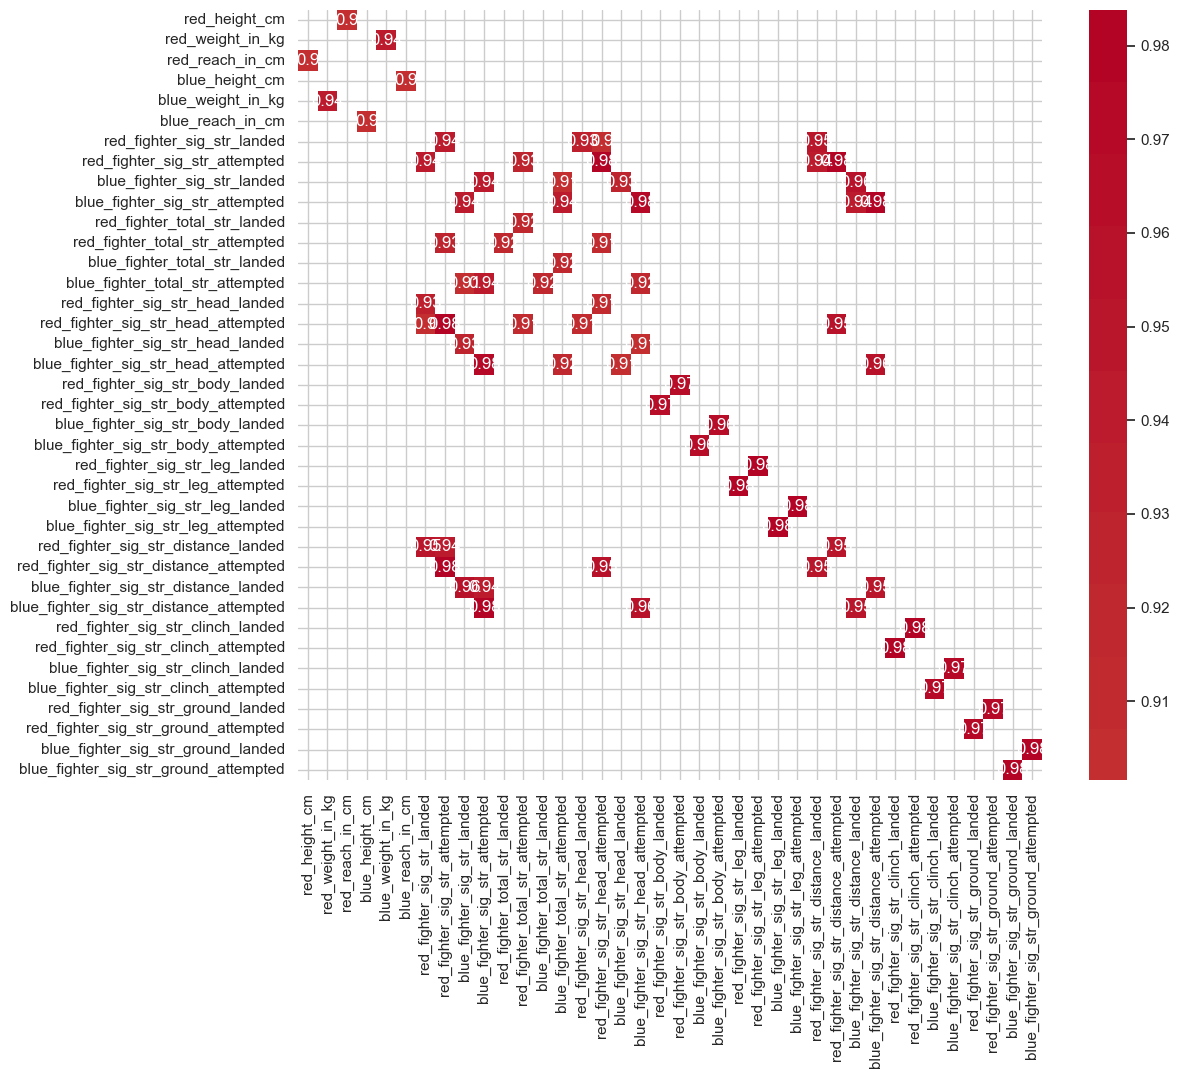

In [87]:
threshold = 0.9
filtered_corr_matrix_lrn = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

np.fill_diagonal(filtered_corr_matrix_lrn.values, np.nan)
filtered_corr_matrix_lrn = filtered_corr_matrix_lrn.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix_lrn, annot=True, cmap='coolwarm', center=0)
plt.show()

We will remove highly correlated features

In [88]:
def remove_correlated_features(dataset, threshold=0.9):
    corr_matrix = dataset.corr().abs()

    # mask for ignoring self-correlations and it is enough only one triangle, because correlation is symetric
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)
    upper_triangle_matrix = corr_matrix * upper_triangle

    # check which columns we need to drop
    columns_to_drop = [
        column for column in upper_triangle_matrix.columns
        if any(upper_triangle_matrix[column] > threshold)
    ]

    reduced_dataset = dataset.drop(columns=columns_to_drop)
    return reduced_dataset, columns_to_drop

numerical_features_df = merged_fighter_stats.select_dtypes(include=['float64', 'int64', 'Int64'])
non_correlated_df, correlated_columns = remove_correlated_features(numerical_features_df, threshold=0.9)


non_correlated_df

,round,time,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,red_fighter_sig_str_landed,blue_fighter_sig_str_landed,red_fighter_total_str_landed,blue_fighter_total_str_landed,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_body_landed,blue_fighter_sig_str_body_landed,red_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_landed,red_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_landed,red_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_landed,red_fighter_age,blue_fighter_age,blue_fighter_stats_missing,red_fighter_stats_missing
0,3,94,1,0,52.0,38.0,100.0,0.0,0,0,0,0,45,0,65,59,14,16,20,24,94,100,0,0,5,0,14.0,0.0,0.0,170.18,65.77,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.3,75,79,78,84,2,2,0,0,11,13,15,19,0,0,4,0,27.0,33.0,0,0
1,1,214,0,0,100.0,75.0,0.0,50.0,0,1,0,0,0,200,0,66,0,33,100,0,100,0,0,0,0,100,25.0,7.0,0.0,182.88,83.91,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,5.72,58.0,3.46,42.0,3.99,46.0,100.0,2.7,2,3,2,25,0,0,2,4,0,1,2,0,0,0,0,3,34.0,30.0,0,0
2,3,300,0,0,48.0,45.0,0.0,0.0,0,0,0,0,91,60,36,18,40,16,23,64,90,94,9,5,0,0,18.0,1.0,1.0,190.50,92.99,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.2,55,53,75,59,0,0,0,1,22,9,13,34,5,3,0,0,32.0,32.0,0,0
3,3,300,0,1,52.0,43.0,60.0,33.0,0,0,0,2,137,287,69,76,23,10,7,13,71,69,23,13,5,17,13.0,0.0,1.0,175.26,65.77,3.65,50.0,2.40,56.0,1.29,46.0,46.0,0.9,17.0,7.0,0.0,170.18,3.76,45.0,3.53,57.0,1.07,26.0,58.0,0.3,52,46,78,52,3,5,1,3,12,5,4,6,12,6,3,8,33.0,33.0,0,0
4,2,292,1,0,61.0,55.0,0.0,0.0,0,0,0,0,2,21,36,28,44,12,18,58,96,97,3,2,0,0,12.0,0.0,0.0,187.96,83.91,7.53,73.0,4.33,28.0,0.00,0.0,57.0,0.0,9.0,2.0,0.0,190.50,5.97,52.0,3.03,56.0,0.23,33.0,36.0,0.0,65,77,67,77,0,0,0,0,29,10,12,45,2,2,0,0,30.0,34.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,1,104,0,0,100.0,80.0,0.0,100.0,0,2,0,0,0,93,0,100,0,0,100,0,100,0,0,0,0,100,14.0,10.0,0.0,162.56,52.16,3.84,37.0,5.19,48.0,1.08,28.0,75.0,0.8,19.0,3.0,0.0,160.02,2.34,40.0,3.03,56.0,2.42,39.0,73.0,1.0,1,4,3,12,0,0,1,1,0,0,1,0,0,0,0,4,40.0,36.0,0,0
2160,3,300,0,0,30.0,44.0,0.0,100.0,0,0,0,0,63,125,58,46,27,16,13,36,88,81,11,0,0,18,17.0,11.0,0.0,175.26,65.77,3.37,44.0,2.89,49.0,3.41,57.0,36.0,1.3,11.0,5.0,1.0,172.72,2.86,38.0,3.83,50.0,1.95,60.0,87.0,0.0,43,49,59,52,0,6,4,4,12,8,6,18,5,0,0,9,34.0,37.0,0,0
2161,3,300,0,0,28.0,65.0,0.0,25.0,0,0,0,0,230,163,71,32,18,17,9,50,100

In [89]:
correlated_columns

['red_reach_in_cm',
 'blue_weight_in_kg',
 'blue_reach_in_cm',
 'red_fighter_sig_str_attempted',
 'blue_fighter_sig_str_attempted',
 'red_fighter_total_str_attempted',
 'blue_fighter_total_str_attempted',
 'red_fighter_sig_str_head_landed',
 'red_fighter_sig_str_head_attempted',
 'blue_fighter_sig_str_head_landed',
 'blue_fighter_sig_str_head_attempted',
 'red_fighter_sig_str_body_attempted',
 'blue_fighter_sig_str_body_attempted',
 'red_fighter_sig_str_leg_attempted',
 'blue_fighter_sig_str_leg_attempted',
 'red_fighter_sig_str_distance_landed',
 'red_fighter_sig_str_distance_attempted',
 'blue_fighter_sig_str_distance_landed',
 'blue_fighter_sig_str_distance_attempted',
 'red_fighter_sig_str_clinch_attempted',
 'blue_fighter_sig_str_clinch_attempted',
 'red_fighter_sig_str_ground_attempted',
 'blue_fighter_sig_str_ground_attempted']

## Outliers detection

It is neccessary to detect outliers. We will use interquartiel range to detect outliers and prepare function for handling

In [90]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]


def count_outliers(df, numerical_features):
    outliers_counter = {}
    for col in numerical_features:
        outliers = detect_outliers(df, col)
        if(len(outliers) > 0):
            outliers_counter[col] = len(outliers)

    df_outliers = pd.DataFrame.from_dict(outliers_counter, orient='index', columns=['Outlier Count'])
    df_outliers.sort_values(by='Outlier Count', ascending=False, inplace=True)

    return df_outliers


def handle_outliers(df, features, upper_quantile=0.75, lower_quantile=0.25):
    for col in features:  
        # in this case apply interquantile range outliers clip[]
        if upper_quantile == 0.75 and lower_quantile == 0.25:
            Q3 = df[col].quantile(upper_quantile)
            Q1 = df[col].quantile(lower_quantile)

            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.clip(df[col], lower_bound, upper_bound)

        else:
            upper_bound = df[col].quantile(upper_quantile)
            lower_bound = df[col].quantile(lower_quantile)
            
            df[col] = np.clip(df[col], lower_bound, upper_bound)
            
    return df




We will exclude those columns round', 'blue_fighter_stats_missing' , 'red_fighter_stats_missing' from outliers removal because round is discrete value and all values have same importance. Other two are in general catewgorical values which have been already encoded. Time is also important to exclude because it is related to round. We can mix the rounds and times the match has been finished


In [91]:
# again calculate numerical features because we removed some
columns_to_exclude_outliers = ['round', 'blue_fighter_stats_missing' , 'red_fighter_stats_missing', 'time']
numerical_features = list(non_correlated_df.select_dtypes(include=['float64', 'int64', 'Int64']).drop(columns=columns_to_exclude_outliers).columns)


print(numerical_features)

['red_fighter_KD', 'blue_fighter_KD', 'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct', 'red_fighter_TD_pct', 'blue_fighter_TD_pct', 'red_fighter_sub_att', 'blue_fighter_sub_att', 'red_fighter_rev', 'blue_fighter_rev', 'red_fighter_ctrl', 'blue_fighter_ctrl', 'red_fighter_sig_str_head_pct', 'blue_fighter_sig_str_head_pct', 'red_fighter_sig_str_body_pct', 'blue_fighter_sig_str_body_pct', 'red_fighter_sig_str_leg_pct', 'blue_fighter_sig_str_leg_pct', 'red_fighter_sig_str_distance_pct', 'blue_fighter_sig_str_distance_pct', 'red_fighter_sig_str_clinch_pct', 'blue_fighter_sig_str_clinch_pct', 'red_fighter_sig_str_ground_pct', 'blue_fighter_sig_str_ground_pct', 'red_wins', 'red_losses', 'red_draws', 'red_height_cm', 'red_weight_in_kg', 'red_significant_strikes_landed_per_minute', 'red_significant_striking_accuracy', 'red_significant_strikes_absorbed_per_minute', 'red_significant_strike_defence', 'red_average_takedowns_landed_per_15_minutes', 'red_takedown_accuracy', 'red_takedown_defens

In [92]:
outliers_sum = count_outliers(non_correlated_df, numerical_features)
outliers_sum

,Outlier Count
red_fighter_sub_att,482
red_fighter_KD,432
blue_fighter_sub_att,384
blue_fighter_KD,355
red_draws,316
...,...
red_fighter_sig_str_head_pct,38
blue_fighter_total_str_landed,37
red_fighter_total_str_landed,29
blue_fighter_age,27


In [93]:
handled_outliers_df = handle_outliers(non_correlated_df, numerical_features, upper_quantile=0.75, lower_quantile=0.25)
outliers_sum = count_outliers(handled_outliers_df, numerical_features)
outliers_sum

,Outlier Count


In [94]:
handled_outliers_df.to_csv(intermediate_steps_folder + 'DS_after_outliers_handling.csv')
handled_outliers_df

,round,time,red_fighter_KD,blue_fighter_KD,red_fighter_sig_str_pct,blue_fighter_sig_str_pct,red_fighter_TD_pct,blue_fighter_TD_pct,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,red_fighter_sig_str_head_pct,blue_fighter_sig_str_head_pct,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,red_wins,red_losses,red_draws,red_height_cm,red_weight_in_kg,red_significant_strikes_landed_per_minute,red_significant_striking_accuracy,red_significant_strikes_absorbed_per_minute,red_significant_strike_defence,red_average_takedowns_landed_per_15_minutes,red_takedown_accuracy,red_takedown_defense,red_average_submissions_attempted_per_15_minutes,blue_wins,blue_losses,blue_draws,blue_height_cm,blue_significant_strikes_landed_per_minute,blue_significant_striking_accuracy,blue_significant_strikes_absorbed_per_minute,blue_significant_strike_defence,blue_average_takedowns_landed_per_15_minutes,blue_takedown_accuracy,blue_takedown_defense,blue_average_submissions_attempted_per_15_minutes,red_fighter_sig_str_landed,blue_fighter_sig_str_landed,red_fighter_total_str_landed,blue_fighter_total_str_landed,red_fighter_TD_landed,red_fighter_TD_attempted,blue_fighter_TD_landed,blue_fighter_TD_attempted,red_fighter_sig_str_body_landed,blue_fighter_sig_str_body_landed,red_fighter_sig_str_leg_landed,blue_fighter_sig_str_leg_landed,red_fighter_sig_str_clinch_landed,blue_fighter_sig_str_clinch_landed,red_fighter_sig_str_ground_landed,blue_fighter_sig_str_ground_landed,red_fighter_age,blue_fighter_age,blue_fighter_stats_missing,red_fighter_stats_missing
0,3,94,0,0,52.0,38.0,100.0,0.0,0,0,0,0,45.0,0,65.0,59,14.0,16.0,20.0,24.0,94.0,100.0,0,0,5,0.0,14.0,0.0,0.0,170.18,65.77,4.44,46.0,3.05,67.0,2.19,56.0,92.0,1.5,25.0,7.0,0.0,180.34,7.17,47.0,4.75,59.0,0.27,53.0,84.0,0.30,75.0,79.0,78.0,84.0,2,2,0.0,0,11,13,15.0,19.0,0,0,4,0.000,27.0,33.0,0,0
1,1,214,0,0,85.0,75.0,0.0,50.0,0,0,0,0,0.0,200,3.5,66,0.0,33.0,56.5,0.0,100.0,28.5,0,0,0,27.5,25.0,7.0,0.0,182.88,83.91,4.47,42.0,3.39,60.0,0.85,39.0,82.0,0.0,13.0,0.0,0.0,187.96,5.72,58.0,3.46,42.0,3.99,46.0,100.0,1.75,2.0,3.0,2.0,25.0,0,0,2.0,4,0,1,2.0,0.0,0,0,0,3.000,34.0,30.0,0,0
2,3,300,0,0,48.0,45.0,0.0,0.0,0,0,0,0,91.0,60,36.0,18,40.0,16.0,23.0,57.5,90.0,94.0,9,5,0,0.0,18.0,1.0,0.0,190.50,92.99,3.56,52.0,2.20,58.0,1.07,31.0,86.0,0.0,14.0,3.0,0.0,193.04,4.01,50.0,2.30,53.0,0.82,25.0,90.0,0.20,55.0,53.0,75.0,59.0,0,0,0.0,1,22,9,13.0,23.5,5,3,0,0.000,32.0,32.0,0,0
3,3,300,0,0,52.0,43.0,60.0,33.0,0,0,0,0,137.0,287,69.0,76,23.0,10.0,7.0,13.0,71.0,69.0,23,13,5,17.0,13.0,0.0,0.0,175.26,65.77,3.65,50.0,2.40,56.0,1.29,46.0,46.0,0.9,17.0,7.0,0.0,170.18,3.76,45.0,3.53,57.0,1.07,26.0,58.0,0.30,52.0,46.0,78.0,52.0,3,5,1.0,3,12,5,4.0,6.0,12,6,3,8.000,33.0,33.0,0,0
4,2,292,0,0,61.0,55.0,0.0,0.0,0,0,0,0,2.0,21,36.0,28,44.0,12.0,18.0,57.5,96.0,97.0,3,2,0,0.0,12.0,0.0,0.0,187.96,83.91,7.45,67.0,4.33,35.5,0.00,0.0,57.0,0.0,9.0,2.0,0.0,190.50,5.97,52.0,3.03,56.0,0.23,33.0,36.0,0.00,65.0,77.0,67.0,77.0,0,0,0.0,0,29,10,12.0,23.5,2,2,0,0.000,30.0,34.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,1,104,0,0,85.0,80.0,0.0,100.0,0,0,0,0,0.0,93,3.5,100,0.0,0.0,56.5,0.0,100.0,28.5,0,0,0,27.5,14.0,10.0,0.0,162.56,52.16,3.84,37.0,5.19,48.0,1.08,28.0,75.0,0.8,19.0,3.0,0.0,160.02,2.34,40.0,3.03,56.0,2.42,39.0,73.0,1.00,1.0,4.0,3.0,12.0,0,0,1.0,1,0,0,1.0,0.0,0,0,0,4.000,40.0,36.0,0,0
2160,3,300,0,0,30.0,44.0,0.0,100.0,0,0,0,0,63.0,125,58.0,46,27.0,16.0,13.0,36.0,88.0,81.0,11,0,0,18.0,17.0,11.0,0